# UMAP

In [3]:
import numpy as np
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style='white', context='notebook')

In [3]:
df = pd.read_csv("./data/DoE_Data_1_4.csv", header=0, names=['Experiment ID','Growth Time','Total Gas Flow Rate','Dew Point','Graphene Presence', 'Graphene Grade'])
df

,Experiment ID,Growth Time,Total Gas Flow Rate,Dew Point,Graphene Presence,Graphene Grade
0,20191211_1,15,200,NaN,No,0
1,20191211_2,15,1000,NaN,Yes,2
2,20191211_3,5,1000,NaN,No,0
3,20191216_2,5,1000,NaN,No,0
4,20191216_3,15,200,NaN,Maybe,1
5,20191216_4,15,200,NaN,Maybe,1
6,20191216_5,15,200,NaN,No,0
7,20191217_1,15,1000,NaN,Yes,2
8,20191218_1,5,1000,NaN,Yes,2
9,20191218_2,5,200,NaN,Yes,2


In [4]:
df = df.dropna()

In [5]:
df

,Experiment ID,Growth Time,Total Gas Flow Rate,Dew Point,Graphene Presence,Graphene Grade
11,20200131_1,5,200,1.89,Maybe,1
12,20200201_1,5,200,1.73,No,0
13,20200202_1,5,1000,5.29,Yes,2
14,20200207_1,5,200,-1.86,No,0
15,20200207_2,15,1000,-1.86,Yes,2
16,20200307_1,7,200,-1.72,No,0
17,20200308_1,7,280,-1.04,No,0
18,20200308_2,5,280,0.44,Yes,2
19,20200309_1,5,280,0.98,Yes,2
20,20200309_2,7,200,1.42,No,0


In [6]:
df = df.set_index([pd.Index(np.array(range(37)))])
df.g_pres = df['Graphene Presence']

In [7]:
df

,Experiment ID,Growth Time,Total Gas Flow Rate,Dew Point,Graphene Presence,Graphene Grade
0,20200131_1,5,200,1.89,Maybe,1
1,20200201_1,5,200,1.73,No,0
2,20200202_1,5,1000,5.29,Yes,2
3,20200207_1,5,200,-1.86,No,0
4,20200207_2,15,1000,-1.86,Yes,2
5,20200307_1,7,200,-1.72,No,0
6,20200308_1,7,280,-1.04,No,0
7,20200308_2,5,280,0.44,Yes,2
8,20200309_1,5,280,0.98,Yes,2
9,20200309_2,7,200,1.42,No,0


In [8]:
df.g_pres.value_counts()

Yes      20
No       11
Maybe     6
Name: Graphene Presence, dtype: int64

In [9]:
#sns.pairplot(df, hue='Graphene Grade')

In [10]:
reducer = umap.UMAP()

In [11]:
df.iloc[:,1:4].values

array([[ 5.000e+00,  2.000e+02,  1.890e+00],
       [ 5.000e+00,  2.000e+02,  1.730e+00],
       [ 5.000e+00,  1.000e+03,  5.290e+00],
       [ 5.000e+00,  2.000e+02, -1.860e+00],
       [ 1.500e+01,  1.000e+03, -1.860e+00],
       [ 7.000e+00,  2.000e+02, -1.720e+00],
       [ 7.000e+00,  2.800e+02, -1.040e+00],
       [ 5.000e+00,  2.800e+02,  4.400e-01],
       [ 5.000e+00,  2.800e+02,  9.800e-01],
       [ 7.000e+00,  2.000e+02,  1.420e+00],
       [ 7.000e+00,  2.000e+02,  5.440e+00],
       [ 7.000e+00,  2.000e+02,  5.040e+00],
       [ 7.000e+00,  2.800e+02,  5.320e+00],
       [ 5.000e+00,  2.800e+02,  5.560e+00],
       [ 5.000e+00,  2.000e+02,  1.138e+01],
       [ 7.000e+00,  2.800e+02,  1.134e+01],
       [ 5.000e+00,  2.000e+02,  4.140e+00],
       [ 5.000e+00,  2.000e+02,  4.140e+00],
       [ 5.000e+00,  2.800e+02,  3.460e+00],
       [ 5.000e+00,  2.000e+02,  2.120e+00],
       [ 7.000e+00,  2.800e+02,  1.980e+00],
       [ 7.000e+00,  2.800e+02,  1.304e+01],
       [ 7

In [12]:
df_data = df[
    [
        "Growth Time",
        "Total Gas Flow Rate",
        "Dew Point"
    ]
].values
scaled_df_data = StandardScaler().fit_transform(df_data)

In [13]:
#print('df data: \n', df_data)
#print('\n \n scaled df data: \n', scaled_df_data)

In [14]:
scaled_df_data.shape

(37, 3)

In [15]:
embedding = reducer.fit_transform(scaled_df_data)
embedding.shape

(37, 2)

In [16]:
embedding
#(np.unique(df.g_pres))[0:3]

array([[15.930595 ,  4.493579 ],
       [15.91169  ,  5.035819 ],
       [ 6.8187575,  5.534865 ],
       [16.26839  ,  4.7829356],
       [13.067445 ,  3.4588888],
       [14.657956 ,  3.6078532],
       [14.513519 ,  3.802303 ],
       [15.457803 ,  4.529239 ],
       [15.973689 ,  5.141651 ],
       [14.321388 ,  3.3168945],
       [13.728826 ,  3.891073 ],
       [13.904662 ,  3.5082178],
       [13.825629 ,  3.6665206],
       [14.76562  ,  5.3760715],
       [14.078084 ,  5.3700953],
       [10.485049 ,  4.332973 ],
       [14.928758 ,  4.844799 ],
       [15.189052 ,  5.4301343],
       [15.3206   ,  5.0572014],
       [15.577405 ,  4.806155 ],
       [14.175726 ,  4.045655 ],
       [ 9.814465 ,  3.791935 ],
       [ 9.983613 ,  4.2349877],
       [ 6.5493317,  5.7743487],
       [ 8.09355  ,  5.523831 ],
       [ 7.4835863,  5.05091  ],
       [ 9.008422 ,  4.289361 ],
       [ 9.021014 ,  4.7263575],
       [ 8.650742 ,  4.825432 ],
       [ 6.432822 ,  5.3544555],
       [ 7

In [17]:
#plt.scatter(
#    embedding[:, 0],
#    embedding[:, 1],
#    c=df['Graphene Presence'])
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the DoE Set', fontsize=18)
#plt.legend(('Maybe', 'Yes', 'No'))

In [18]:
#df['Graphene Presence']

In [19]:
df['umap_x'] = embedding[:, 0]
df['umap_y'] = embedding[:, 1]
df

,Experiment ID,Growth Time,Total Gas Flow Rate,Dew Point,Graphene Presence,Graphene Grade,umap_x,umap_y
0,20200131_1,5,200,1.89,Maybe,1,15.930595,4.493579
1,20200201_1,5,200,1.73,No,0,15.911690,5.035819
2,20200202_1,5,1000,5.29,Yes,2,6.818758,5.534865
3,20200207_1,5,200,-1.86,No,0,16.268391,4.782936
4,20200207_2,15,1000,-1.86,Yes,2,13.067445,3.458889
5,20200307_1,7,200,-1.72,No,0,14.657956,3.607853
6,20200308_1,7,280,-1.04,No,0,14.513519,3.802303
7,20200308_2,5,280,0.44,Yes,2,15.457803,4.529239
8,20200309_1,5,280,0.98,Yes,2,15.973689,5.141651
9,20200309_2,7,200,1.42,No,0,14.321388,3.316895


In [20]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(scaled_df_data)
X_embedded.shape

(37, 2)

In [21]:
df['tsne_x'] = X_embedded[:, 0]
df['tsne_y'] = X_embedded[:, 1]
df

,Experiment ID,Growth Time,Total Gas Flow Rate,Dew Point,Graphene Presence,Graphene Grade,umap_x,umap_y,tsne_x,tsne_y
0,20200131_1,5,200,1.89,Maybe,1,15.930595,4.493579,30.408272,-10.878674
1,20200201_1,5,200,1.73,No,0,15.911690,5.035819,39.564053,1.339940
2,20200202_1,5,1000,5.29,Yes,2,6.818758,5.534865,-42.252106,-13.102972
3,20200207_1,5,200,-1.86,No,0,16.268391,4.782936,43.862850,-14.692468
4,20200207_2,15,1000,-1.86,Yes,2,13.067445,3.458889,-46.010178,49.118919
5,20200307_1,7,200,-1.72,No,0,14.657956,3.607853,9.191396,-41.195454
6,20200308_1,7,280,-1.04,No,0,14.513519,3.802303,-5.985379,-34.794228
7,20200308_2,5,280,0.44,Yes,2,15.457803,4.529239,9.090361,-15.278813
8,20200309_1,5,280,0.98,Yes,2,15.973689,5.141651,33.924633,-25.510614
9,20200309_2,7,200,1.42,No,0,14.321388,3.316895,7.784652,-27.524555


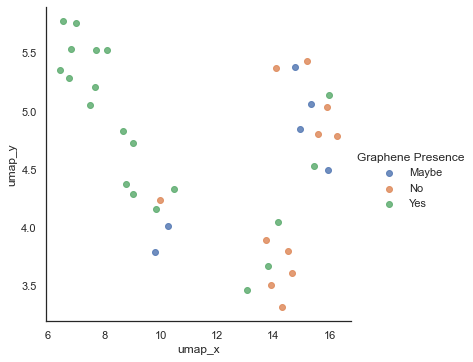

In [23]:
#df_plot = pd.DataFrame(embedding, columns=['x','y'])
#df_plot.insert(2, 'Graphene Presence', df['Graphene Presence'])
#df_plot
#sns.lmplot(embedding[:, 0], embedding[:, 1], data, hue='continent', fit_reg=False)
#fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.lmplot('umap_x', 'umap_y', data=df, hue='Graphene Presence', fit_reg=False)
#sns.lmplot('tsne_x', 'tsne_y', data=df, hue='Graphene Presence', fit_reg=False, ax=ax2)
#plt.show()

In [24]:
#[sns.color_palette()[0],sns.color_palette()[2],sns.color_palette()[3]]
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

# Bayesian Guided Search using RBF kernel SVM

In [11]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        print('\nC:', C, ', gamma:', gamma)
        #print('\ngamma: ', gamma)


C: 0.01 , gamma: 0.1

C: 0.01 , gamma: 1

C: 0.01 , gamma: 10.0

C: 1 , gamma: 0.1

C: 1 , gamma: 1

C: 1 , gamma: 10.0

C: 100.0 , gamma: 0.1

C: 100.0 , gamma: 1

C: 100.0 , gamma: 10.0
